predict (before training) 4 4.0
epoch: 0 w= 1.0933333333333333 loss= 4.666666666666667
epoch: 1 w= 1.1779555555555554 loss= 3.8362074074074086
epoch: 2 w= 1.2546797037037036 loss= 3.1535329869958857
epoch: 3 w= 1.3242429313580246 loss= 2.592344272332262
epoch: 4 w= 1.3873135910979424 loss= 2.1310222071581117
epoch: 5 w= 1.4444976559288012 loss= 1.7517949663820642
epoch: 6 w= 1.4963445413754464 loss= 1.440053319920117
epoch: 7 w= 1.5433523841804047 loss= 1.1837878313441108
epoch: 8 w= 1.5859728283235668 loss= 0.9731262101573632
epoch: 9 w= 1.6246153643467005 loss= 0.7999529948031382
epoch: 10 w= 1.659651263674342 loss= 0.6575969151946154
epoch: 11 w= 1.6914171457314033 loss= 0.5405738908195378
epoch: 12 w= 1.7202182121298057 loss= 0.44437576375991855
epoch: 13 w= 1.7463311789976905 loss= 0.365296627844598
epoch: 14 w= 1.7700069356245727 loss= 0.3002900634939416
epoch: 15 w= 1.7914729549662791 loss= 0.2468517784170642
epoch: 16 w= 1.8109354791694263 loss= 0.2029231330489788
epoch: 17 w= 

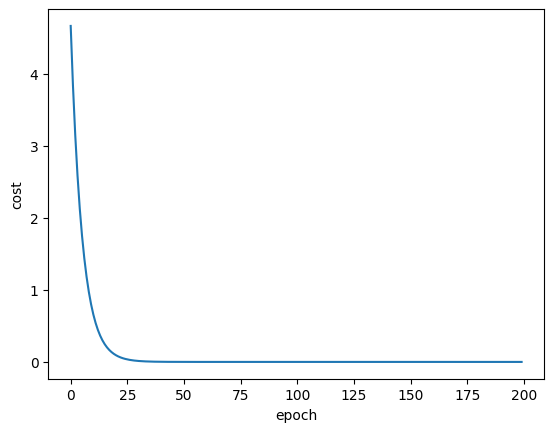

In [2]:
import matplotlib.pyplot as plt
 
# prepare the training set
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
# initial guess of weight 
w = 1.0
 
# define the model linear model y = w*x
def forward(x):
    return x*w
 
#define the cost function MSE 
def cost(xs, ys):
    cost = 0
    for x, y in zip(xs,ys):
        y_pred = forward(x)
        cost += (y_pred - y)**2
    return cost / len(xs)
 
# define the gradient function  gd
def gradient(xs,ys):
    grad = 0
    for x, y in zip(xs,ys):
        grad += 2*x*(x*w - y)
    return grad / len(xs)
 
epoch_list = []
cost_list = []
print('predict (before training)', 4, forward(4))
for epoch in range(200):
    cost_val = cost(x_data, y_data)
    grad_val = gradient(x_data, y_data)
    w -= 0.01 * grad_val  # 0.01 learning rate
    print('epoch:', epoch, 'w=', w, 'loss=', cost_val)
    epoch_list.append(epoch)
    cost_list.append(cost_val)
 
print('predict (after training)', 4, forward(4))
plt.plot(epoch_list,cost_list)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show() 

### 随机梯度下降
随机梯度下降法在神经网络中被证明是有效的。效率较低(时间复杂度较高)，学习性能较好。

随机梯度下降法和梯度下降法的主要区别在于：

1、损失函数由cost()更改为loss()。cost是计算所有训练数据的损失，loss是计算一个训练数据的损失。对应于源代码则是少了两个for循环。

2、梯度函数gradient()由计算所有训练数据的梯度更改为计算一个训练数据的梯度。

3、本算法中的随机梯度主要是指，每次拿一个训练数据来训练，然后更新梯度参数。本算法中梯度总共更新100(epoch)x3 = 300次。梯度下降法中梯度总共更新100(epoch)次。


随机梯度下降中同一组数据计算时，只能串行计算，依赖上一个数据更新后的w，时间复杂度高，模型拟合性能高
随机梯度下降中同一组数据计算时，依赖同一个w，可以并行计算，时间复杂度低，模型拟合性能低

predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad: 1.0 2.0 -1.478624
	grad: 2.0 4.0 -5.796206079999999
	grad: 3.0 6.0 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad: 1.0 2.0 -1.093164466688
	grad: 2.0 4.0 -4.285204709416961
	grad: 3.0 6.0 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad: 1.0 2.0 -0.8081896081960389
	grad: 2.0 4.0 -3.1681032641284723
	grad: 3.0 6.0 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad: 1.0 2.0 -0.59750427561463
	grad: 2.0 4.0 -2.3422167604093502
	grad: 3.0 6.0 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad: 1.0 2.0 -0.44174208101320334
	grad: 2.0 4.0 -1.7316289575717576
	grad: 3.0 6.0 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad: 1.0 2.0 -0.3265852213980338
	grad: 2.0 4.0 -1.2802140678

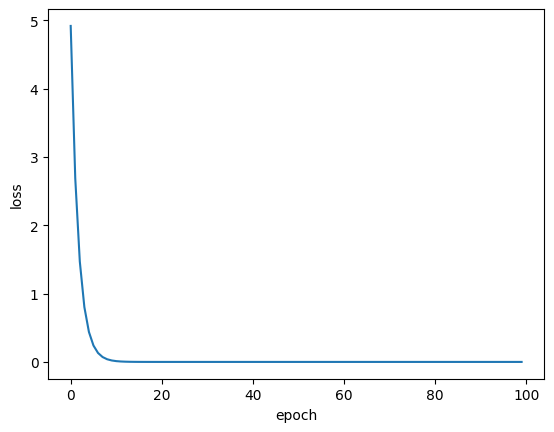

In [5]:
import matplotlib.pyplot as plt
 
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
w = 1.0
 
def forward(x):
    return x*w
 
# calculate loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2
 
# define the gradient function  sgd
def gradient(x, y):
    return 2*x*(x*w - y)
 
epoch_list = []
loss_list = []
print('predict (before training)', 4, forward(4))
for epoch in range(100):
    for x,y in zip(x_data, y_data):
        grad = gradient(x,y)
        w = w - 0.01*grad    # update weight by every grad of sample of training set
        print("\tgrad:", x, y,grad)
        l = loss(x,y)
    print("progress:",epoch,"w=",w,"loss=",l)
    epoch_list.append(epoch)
    loss_list.append(l)
 
print('predict (after training)', 4, forward(4))
plt.plot(epoch_list,loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show() 